<a href="https://colab.research.google.com/github/sidpatondikar/ML_Practice/blob/main/Supervised_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scaling and its importance

Scaling data is a crucial preprocessing step in machine learning to ensure that features are on a similar scale. Common scaling techniques include Standardization (mean = 0, standard deviation = 1) and Min-Max Scaling (scaling features to a specific range, often [0, 1]). When applying scaling to your data, it is essential to understand the difference between **`fit_transform`** and **`transform`**, particularly when dealing with training and test datasets.

1. **`fit_transform`**:
    - This method combines two steps: fitting the scaling parameters on the data and then transforming the data based on these parameters.
    - When you call **`fit_transform`** on the training data, the scaler learns the mean and standard deviation (or other parameters, depending on the scaling method) from the training set.
    - It then applies the learned scaling parameters to the training data, transforming it to a scaled version of the original data.
    - This process ensures that the training data is correctly scaled based on the statistics learned from itself.
2. **`transform`**:
    - This method applies the scaling parameters learned from the training data to a new dataset (e.g., test data or any unseen data).
    - The purpose of using only **`transform`** on the test data is to keep the scaling consistent with the training data.
    - We should not use **`fit_transform`** on the test data because doing so would result in the scaler learning new scaling parameters from the test data itself, which would be incorrect and introduce data leakage.
    - Data leakage occurs when information from the test set unintentionally influences the model's training process, leading to overly optimistic results and poor generalization.

Here's a step-by-step process to correctly scale your data:

1. **On the Training Data**:
a. First, initialize your scaler (e.g., StandardScaler or MinMaxScaler).
b. Use **`fit_transform`** on the training data to compute the scaling parameters (mean, standard deviation, etc.) and apply the scaling to the training data.
2. **On the Test Data**:
a. Use **`transform`** on the test data to apply the same scaling parameters learned from the training data.
b. By using **`transform`** instead of **`fit_transform`**, you ensure that the test data is scaled consistently with the training data.

Here's a code example in Python using scikit-learn:

```python
pythonCopy code
from sklearn.preprocessing import StandardScaler

# Assuming you have your training data in X_train and test data in X_test

# Step 1: Scaling the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 2: Scaling the test data using the parameters learned from the training data
X_test_scaled = scaler.transform(X_test)

```

Remember, the primary goal is to avoid any information from the test set influencing the preprocessing decisions, ensuring that the model's performance evaluation is fair and unbiased.


Q. C**an you take a sample numeric dataset, divide it into train and test, and explain the above process mathematically by applying fit_transform and transform?**


Certainly! Let's take a simple numeric dataset as an example and walk through the process of scaling the data using the **`fit_transform`** and **`transform`** methods. We'll use the StandardScaler from scikit-learn for this demonstration.

Consider the following numeric dataset:

```makefile
makefileCopy code
Dataset: [5, 10, 15, 20, 25]

```

Let's divide this dataset into a training set and a test set. For simplicity, we'll use a 80-20 split:

```jsx
javascriptCopy code
Training Set: [5, 10, 15]
Test Set: [20, 25]

```

Step 1: Scaling the Training Data (fit_transform)

1. Compute the mean and standard deviation of the training set:
    
    Mean (μ) = (5 + 10 + 15) / 3 = 10
    
    Standard Deviation (σ) = √[((5-10)² + (10-10)² + (15-10)²) / 3] = √(25 / 3) ≈ 2.89
    
2. Standardize the training set using the calculated mean and standard deviation:
    
    ```less
    lessCopy code
    Scaled Training Set: [(-5/2.89), (0), (5/2.89)] ≈ [-1.73, 0, 1.73]
    
    ```
    

Step 2: Scaling the Test Data (transform)

1. Use the same mean and standard deviation obtained from the training set to scale the test set:
    
    ```less
    lessCopy code
    Scaled Test Set: [(20-10)/2.89, (25-10)/2.89] ≈ [3.46, 5.19]
    
    ```
    

Now, let's implement this process in Python using scikit-learn:

```python
pythonCopy code
import numpy as np
from sklearn.preprocessing import StandardScaler

# Sample dataset
data = np.array([5, 10, 15, 20, 25])

# Divide data into training and test sets
X_train = data[:3].reshape(-1, 1)  # Training set: [5, 10, 15]
X_test = data[3:].reshape(-1, 1)   # Test set: [20, 25]

# Step 1: Scaling the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 2: Scaling the test data using the parameters learned from the training data
X_test_scaled = scaler.transform(X_test)

print("Scaled Training Set:")
print(X_train_scaled)  # Output: [[-1.73205081], [0.], [1.73205081]]

print("Scaled Test Set:")
print(X_test_scaled)  # Output: [[3.46410162], [5.19615242]]

```

As you can see, the training set is centered around 0 and has a standard deviation of approximately 1 after scaling. The test set is scaled using the same mean and standard deviation as the training set. This ensures that both datasets are scaled consistently and prevents data leakage during the scaling process.


**Q. How will the above example apply when we are using MinMaxScaler?**


When using the MinMaxScaler, the scaling process is different compared to the StandardScaler. The MinMaxScaler scales the features to a specific range, typically [0, 1], by normalizing the data based on the minimum and maximum values of the training set. The same concept of **`fit_transform`** and **`transform`** applies, but the scaling equations will differ from what we saw in the StandardScaler example.

Let's use the same numeric dataset as before:

```makefile
makefileCopy code
Dataset: [5, 10, 15, 20, 25]

```

And divide it into a training set and a test set:

```jsx
javascriptCopy code
Training Set: [5, 10, 15]
Test Set: [20, 25]

```

Step 1: Scaling the Training Data (fit_transform)

1. Compute the minimum and maximum values of the training set:
    
    Minimum (min) = 5
    
    Maximum (max) = 15
    
2. Scale the training set to the range [0, 1]:
    
    ```less
    lessCopy code
    Scaled Training Set: [(5-5)/(15-5), (10-5)/(15-5), (15-5)/(15-5)] = [0.0, 0.5, 1.0]
    
    ```
    

Step 2: Scaling the Test Data (transform)

1. Use the same minimum and maximum values obtained from the training set to scale the test set:
    
    ```less
    lessCopy code
    Scaled Test Set: [(20-5)/(15-5), (25-5)/(15-5)] ≈ [1.5, 2.0]
    
    ```
    

Now, let's implement this process in Python using scikit-learn:

```python
pythonCopy code
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Sample dataset
data = np.array([5, 10, 15, 20, 25])

# Divide data into training and test sets
X_train = data[:3].reshape(-1, 1)  # Training set: [5, 10, 15]
X_test = data[3:].reshape(-1, 1)   # Test set: [20, 25]

# Step 1: Scaling the training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 2: Scaling the test data using the parameters learned from the training data
X_test_scaled = scaler.transform(X_test)

print("Scaled Training Set:")
print(X_train_scaled)  # Output: [[0. ], [0.5], [1. ]]

print("Scaled Test Set:")
print(X_test_scaled)  # Output: [[1.5], [2. ]]

```

As you can see, the training set is scaled to the range [0, 1], with 0 corresponding to the minimum value and 1 corresponding to the maximum value of the training set. The test set is scaled using the same minimum and maximum values as the training set, ensuring consistent scaling between both datasets. This prevents data leakage and maintains the integrity of the test set during the scaling process.

**Q. Why is scaling important?**



Scaling is important in machine learning for several reasons:

1. **Improved Model Performance**: Many machine learning algorithms, such as gradient-based optimization methods in neural networks, K-nearest neighbors, and support vector machines, are sensitive to the scale of input features. When features have significantly different scales, certain algorithms might give more weight to features with larger scales, leading to suboptimal model performance.
2. **Faster Convergence**: Scaling can help algorithms converge faster during the training process. When features are on similar scales, the optimization algorithms can find the optimal solution more quickly, reducing the number of iterations required to reach convergence.
3. **Regularization and Distance Metrics**: Regularization techniques like L1 and L2 regularization assume that all features have similar scales. Scaling ensures that regularization affects all features equally. Similarly, distance-based algorithms like K-nearest neighbors rely on the distance between data points, which can be influenced by the scale of the features. Scaling helps ensure that distances are calculated more accurately.
4. **Avoiding Numerical Instabilities**: Large differences in feature scales can lead to numerical instabilities, especially in certain algorithms involving exponentiation or divisions, which can cause overflow or underflow errors. Scaling mitigates these issues.
5. **Easier Interpretation**: Scaling makes it easier to interpret the impact of different features on the model's predictions since all features are on the same scale. This is especially important in linear models, where feature coefficients directly indicate the feature's importance.
6. **Feature Importance and Selection**: Feature importance and selection techniques can be sensitive to feature scales. Scaling features can provide a more accurate representation of feature importance.
7. **Preventing Bias**: Some machine learning algorithms use distance-based measures to make decisions, such as clustering or nearest-neighbor classification. Scaling ensures that the distance measure is not dominated by a single feature, avoiding potential bias.
8. **Compatibility with Certain Algorithms**: Certain algorithms, like Support Vector Machines (SVM), are explicitly designed with the assumption that the features are scaled. To ensure optimal performance with these algorithms, scaling is necessary.

Overall, scaling ensures that the features contribute equally to the learning process, prevents issues arising from different feature scales, and improves the overall stability and efficiency of the machine learning algorithms. It is a crucial preprocessing step that helps in obtaining better models and accurate predictions.

**Q. When we are scaling the data with several columns, so does the scaler learn mean, standard deviation of each column and scale accordingly or if now then how does it work?**


Yes, when you are scaling the data with several columns, the scaler learns the mean and standard deviation (or other scaling parameters) of each column individually and scales the data accordingly. Different columns may have different scales, and it is essential to handle them separately to avoid biasing the model's performance towards one feature over another.

Let's take an example with a dataset containing multiple columns:

```markdown
markdownCopy code
Dataset:

   Column 1 | Column 2 | Column 3
---------------------------------
      5    |    10    |   20
     10    |    15    |   30
     15    |    20    |   40

```

Suppose we want to use StandardScaler to scale this dataset. The scaler will compute the mean and standard deviation for each column separately:

```mathematica
mathematicaCopy code
For Column 1:
   Mean (μ) = (5 + 10 + 15) / 3 = 10
   Standard Deviation (σ) = √[((5-10)² + (10-10)² + (15-10)²) / 3] = √(25 / 3) ≈ 2.89

For Column 2:
   Mean (μ) = (10 + 15 + 20) / 3 = 15
   Standard Deviation (σ) = √[((10-15)² + (15-15)² + (20-15)²) / 3] = √(25 / 3) ≈ 2.89

For Column 3:
   Mean (μ) = (20 + 30 + 40) / 3 = 30
   Standard Deviation (σ) = √[((20-30)² + (30-30)² + (40-30)²) / 3] = √(66.67) ≈ 8.16

```

Then, the scaler will standardize each column based on its respective mean and standard deviation:

```markdown
markdownCopy code
Scaled Data:

   Column 1  |  Column 2  |  Column 3
-------------------------------------
   -1.73    |   -1.22    |   -1.22
    0        |    0        |    0
    1.73    |    1.22    |    1.22

```

As you can see, each column is scaled independently, ensuring that each feature is centered around 0 and has a standard deviation of 1, which is the characteristic of StandardScaler.

The same concept applies to other scaling methods, such as MinMaxScaler, where each column is scaled based on its minimum and maximum values independently.

By scaling each column separately, you ensure that the features are treated fairly and their scales do not influence the model's training process disproportionately. This helps in creating a more accurate and reliable machine learning model.

**Q. Considering the above example, does the scaler than take parameters of each column and apply it respectively in test data to scale?**

ChatGPT

Yes, exactly! When you scale the test data using a scaler that has been fitted on the training data, the scaler will use the parameters learned from each column of the training data and apply them respectively to the corresponding columns in the test data. This ensures that the scaling is consistent between the training and test data, preventing any data leakage and maintaining the integrity of the test set.

Let's take the same example as before:

```markdown
markdownCopy code
Training Data:

   Column 1 | Column 2 | Column 3
---------------------------------
      5    |    10    |   20
     10    |    15    |   30
     15    |    20    |   40

```

We previously computed the mean and standard deviation for each column:

```mathematica
mathematicaCopy code
For Column 1:
   Mean (μ) = 10
   Standard Deviation (σ) ≈ 2.89

For Column 2:
   Mean (μ) = 15
   Standard Deviation (σ) ≈ 2.89

For Column 3:
   Mean (μ) = 30
   Standard Deviation (σ) ≈ 8.16

```

Now, let's say we have a test dataset:

```markdown
markdownCopy code
Test Data:

   Column 1 | Column 2 | Column 3
---------------------------------
      25   |    35    |   50

```

To scale the test data, we use the scaler that has already been fitted on the training data. The scaler will apply the respective mean and standard deviation values from the training data to the test data:

```markdown
markdownCopy code
Scaled Test Data:

   Column 1  |  Column 2  |  Column 3
-------------------------------------
    3.47    |    3.47    |    3.47

```

As you can see, the test data is scaled using the parameters learned from the training data. Each column in the test data is scaled independently based on the mean and standard deviation of the corresponding column in the training data. This ensures that the scaling is consistent with how the training data was processed and prevents any information from the test set influencing the scaling process, avoiding data leakage.

By maintaining this consistency, you can confidently evaluate the performance of your machine learning model on the test data, as it is scaled in the same way as the training data on which the model was trained.


**Q. Give me a real life example of dataset where scaling is beneficial and the consequence on result when scaling is not done**

ChatGPT

Sure! Let's consider a real-life example involving a dataset related to housing prices. We'll explore how scaling can be beneficial in improving the performance of a machine learning model and the consequences when scaling is not done.

**Dataset Description**:
Suppose we have a dataset that contains various features related to houses, such as the square footage of the house (**`area`**), the number of bedrooms (**`bedrooms`**), the distance to the nearest school (**`distance_to_school`**), and the age of the house (**`age`**). The target variable is the price of the house (**`price`**).

**Scenario 1: Scaling the Data**

In this scenario, we decide to scale the numerical features (**`area`**, **`bedrooms`**, **`distance_to_school`**, and **`age`**) before building a machine learning model to predict the house prices.

**Benefit of Scaling**:
By scaling the features, we bring them to a similar scale, ensuring that all features contribute equally during the learning process. This can lead to several benefits:

1. **Improved Model Convergence**: Scaling helps optimization algorithms (e.g., gradient descent) converge faster, as the features are on a similar scale, and the algorithms can find the optimal weights more efficiently.
2. **Better Model Performance**: Many machine learning algorithms, like linear regression and support vector machines, are sensitive to feature scales. Scaling the features can lead to better model performance and more accurate predictions.
3. **Interpretability**: Scaling facilitates the interpretation of feature importance. The feature coefficients in linear models directly reflect the impact of each feature on the target variable, and scaling ensures fair comparison among the coefficients.

**Scenario 2: No Scaling**

In this scenario, we skip the scaling step and directly build the machine learning model using the raw, unscaled data.

**Consequences of No Scaling**:

1. **Feature Dominance**: Features with larger numerical ranges (e.g., **`area`**) might dominate the learning process, causing the model to pay more attention to these features while neglecting others.
2. **Slow Convergence**: Optimization algorithms may take more iterations to converge, as the range of features can lead to slower convergence rates.
3. **Biased Model**: The model's performance might be biased towards features with larger scales, leading to suboptimal predictions.
4. **Misleading Feature Importance**: Without scaling, the feature coefficients in linear models might not accurately represent the true importance of each feature. It can be challenging to interpret the impact of features correctly.

**Conclusion**:
In this real-life example, scaling the dataset is essential to ensure that the machine learning model performs optimally and avoids potential biases caused by feature scales. Skipping the scaling step may lead to suboptimal results, slower convergence, and difficulties in interpreting the model's behavior. Therefore, scaling is a crucial preprocessing step in many machine learning scenarios, and it's vital to apply it appropriately to achieve accurate and reliable models.

# Polynomial Regression



Polynomial regression is a type of regression analysis where the relationship between the independent variable (input feature) and the dependent variable (output or target) is modeled as an nth-degree polynomial function. In contrast to linear regression, where the relationship is modeled as a straight line, polynomial regression can capture more complex, nonlinear relationships between variables.

The general form of a polynomial regression equation with one independent variable (feature) is:

```
y = β0 + β1 * x + β2 * x^2 + β3 * x^3 + ... + βn * x^n + ε

```

Where:

- `y` is the dependent variable (target or output).
- `x` is the independent variable (input feature).
- `β0, β1, β2, ..., βn` are the coefficients of the polynomial terms, representing the influence of each term on the target variable.
- `n` is the degree of the polynomial, determining how many polynomial terms are included in the equation.
- `ε` represents the error term (residuals), which accounts for the part of the target variable that is not explained by the polynomial regression model.

The key idea in polynomial regression is to transform the original input feature `x` into higher-order polynomial terms `x^2`, `x^3`, ..., `x^n`, which allows the model to fit more complex patterns in the data.

For example, consider a dataset where the relationship between the input feature (x) and the target variable (y) appears to be curvilinear. In such cases, a simple linear regression model may not be sufficient to capture the underlying pattern accurately. Polynomial regression can be used to model the relationship with a polynomial curve, allowing the model to flexibly fit the data.

To perform polynomial regression, the steps typically involve:

1. **Data Preprocessing**: Prepare the data, including cleaning, handling missing values, and splitting the dataset into training and test sets.
2. **Feature Transformation**: Create new polynomial features by elevating the original feature (`x`) to different degrees (e.g., `x^2`, `x^3`, etc.) based on the desired polynomial degree.
3. **Model Training**: Use the transformed features to train the polynomial regression model on the training data. This involves estimating the coefficients `β0, β1, β2, ..., βn` that best fit the data.
4. **Model Evaluation**: Evaluate the model's performance on the test data using appropriate metrics such as mean squared error (MSE) or R-squared to assess how well the polynomial curve fits the data.
5. **Model Visualization**: Plot the original data points along with the fitted polynomial curve to visualize how well the model captures the underlying relationship.

It's essential to note that while polynomial regression can capture more complex patterns, using higher-degree polynomials can also lead to overfitting, where the model fits the training data very well but fails to generalize to new, unseen data. Therefore, selecting an appropriate polynomial degree is crucial, and techniques like cross-validation can be used to tune the model and prevent overfitting.

**Suppose there are multiple independent features, does polynomial regression calculate nth degree for each of the feature. What will be the regression equation in that case**

Yes, in polynomial regression with multiple independent features, the polynomial terms are computed for each of the features up to the specified degree. The regression equation will include all the possible combinations of polynomial terms involving the different independent features.

Let's consider an example with two independent features, `x1` and `x2`, and we want to perform polynomial regression of degree 2.

The general polynomial regression equation for two features up to the second degree (quadratic) is:

```
y = β0 + β1*x1 + β2*x2 + β3*x1^2 + β4*x1*x2 + β5*x2^2 + ε

```

Where:

- `y` is the dependent variable (target or output).
- `x1` and `x2` are the two independent features (input variables).
- `β0, β1, β2, ..., β5` are the coefficients of the polynomial terms, representing the influence of each term on the target variable.
- `ε` represents the error term (residuals), accounting for the part of the target variable that is not explained by the polynomial regression model.

In this equation, the model considers all the possible combinations of polynomial terms up to the second degree involving `x1` and `x2`, such as `x1^2`, `x2^2`, and `x1*x2` (cross-product term).

For higher-degree polynomial regression (e.g., degree 3), the equation would include additional terms, such as `x1^3`, `x2^3`, `x1^2*x2`, `x1*x2^2`, and so on, capturing more complex relationships between the features.

The number of polynomial terms in the equation increases rapidly with the degree of the polynomial and the number of features. As a result, higher-degree polynomial regression can quickly lead to overfitting if the model is not carefully regularized or constrained.

To summarize, in polynomial regression with multiple features, the regression equation includes all the polynomial terms and cross-product terms up to the specified degree, allowing the model to capture more complex interactions between the independent features and the target variable. However, it's essential to be cautious with higher-degree polynomials to avoid overfitting and to ensure that the model generalizes well to new data. Regularization techniques like Ridge or Lasso regression can be used to control the complexity of the model and prevent overfitting.

**Take a real life dataset. Use polynomial regression on it. Perform all the required preprocessing tasks, get the optimal nth polynomial and predict the target variable. All coding steps should be explained in detail**

As an AI language model, I don't have access to real-life data or the capability to execute code directly. However, I can guide you through the steps to perform polynomial regression on a real-life dataset using Python and popular libraries like NumPy, pandas, scikit-learn, and matplotlib.

Let's assume you have a real-life dataset in a CSV file named `dataset.csv`, where the independent variables are labeled as `x1`, `x2`, ..., and the dependent variable (target) is labeled as `y`.

Step 1: Import the required libraries and load the dataset.

```python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset.csv')

# Separate the independent variables (features) and the dependent variable (target)
X = df.drop('y', axis=1)
y = df['y']

```

Step 2: Split the data into training and test sets.

```python
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

```

Step 3: Perform polynomial feature transformation.

```python
# Define the degree of the polynomial (you can experiment with different values)
degree = 2

# Create the polynomial features up to the specified degree
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

```

Step 4: Train the polynomial regression model.

```python
# Create and train the polynomial regression model
poly_regression_model = LinearRegression()
poly_regression_model.fit(X_train_poly, y_train)

```

Step 5: Make predictions and evaluate the model.

```python
# Make predictions on the test data
y_pred = poly_regression_model.predict(X_test_poly)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize the predictions against the true values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.show()

```

Step 6: Get the optimal polynomial degree (Optional)

You can experiment with different polynomial degrees and select the one that gives the best performance based on metrics like mean squared error or using cross-validation.

For example, you can create a loop to try different degrees and choose the one with the lowest mean squared error:

```python
best_degree = None
best_mse = float('inf')

for degree in range(1, 6):  # Try degrees from 1 to 5
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    poly_regression_model = LinearRegression()
    poly_regression_model.fit(X_train_poly, y_train)

    y_pred = poly_regression_model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)

    if mse < best_mse:
        best_mse = mse
        best_degree = degree

print("Best Polynomial Degree:", best_degree)

```

This will help you find the optimal degree for your polynomial regression model based on the test performance.

Remember that polynomial regression can easily lead to overfitting if the degree is too high, so it's crucial to balance complexity and model performance using techniques like cross-validation and regularization.

**Is scaling not required in polynomial regression? As it's not used above**

Scaling can still be beneficial in polynomial regression, especially when the features have significantly different scales. While it was not explicitly shown in the code provided above, it's generally a good practice to scale the features before performing polynomial regression.

Here's why scaling can be important in polynomial regression:

1. **Numerical Stability**: When features have different scales, it can lead to numerical instability during the polynomial feature transformation process. Elevating large values to high degrees can result in very large feature values, which might affect the model's numerical stability and slow down the optimization process.
2. **Regularization**: If you plan to add regularization to your polynomial regression model (e.g., Ridge or Lasso regression), scaling becomes essential. Regularization terms penalize large coefficients, and if the features are on different scales, the regularization might unfairly penalize some features more than others.
3. **Interpretation**: Scaling makes it easier to interpret the impact of each feature on the target variable. With scaled features, the coefficients in the polynomial regression equation directly reflect the change in the target variable per unit change in each feature.
4. **Comparability**: When comparing the effect of different features or comparing models with different features, scaling ensures that all features are on the same scale, making the comparisons more meaningful.

To incorporate scaling into the code, you can use the `StandardScaler` from scikit-learn:

```python
from sklearn.preprocessing import StandardScaler

# Create a scaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

```

By scaling the features, you ensure that each feature contributes equally during the polynomial feature transformation and the subsequent model training. This leads to more stable and reliable polynomial regression models. Additionally, it can help you avoid potential issues caused by differences in feature scales and ensure the model generalizes well to new data.

**What is fit_transform and transform doing in polynomial regression?**

In polynomial regression, the `fit_transform` and `transform` methods are used in the context of feature transformation, specifically for applying polynomial feature expansion to the independent variables (features).

1. **fit_transform**:
    - The `fit_transform` method is used to both fit the feature transformation on the training data and then apply the transformation to the same training data.
    - When you call `fit_transform` on the training data, it first learns the necessary parameters from the data (e.g., polynomial degrees) and then transforms the data based on these learned parameters.
    - In polynomial regression, `fit_transform` is used to compute and create the polynomial features up to the specified degree based on the training data.
2. **transform**:
    - The `transform` method, on the other hand, is used to apply the transformation based on the parameters learned from the training data to new, unseen data (e.g., test data).
    - When you call `transform` on the test data, it applies the same feature transformation (e.g., polynomial expansion) that was learned from the training data.
    - In polynomial regression, `transform` is used to apply the same polynomial feature expansion to the test data as was applied to the training data.

Let's revisit the relevant code for polynomial feature transformation using `fit_transform` and `transform`:

```python
from sklearn.preprocessing import PolynomialFeatures

# Define the degree of the polynomial (e.g., degree=2)
degree = 2

# Create the polynomial features up to the specified degree for training data
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)

# Transform the test data using the same polynomial expansion
X_test_poly = poly_features.transform(X_test)

```

Here, `X_train_poly` will contain the training data with the polynomial features up to the specified degree, and `X_test_poly` will contain the test data transformed with the same polynomial features that were learned from the training data.

By using both `fit_transform` and `transform`, you ensure that the same polynomial feature transformation is consistently applied to both the training and test data. This consistency prevents data leakage and ensures that the test data is processed in the same way as the training data, allowing for fair evaluation of the polynomial regression model's performance on unseen data.

**How to apply cross validation and hyperparameter tuning in polynomial regression. Explain with continuation to the above examples**

Applying cross-validation and hyperparameter tuning in polynomial regression involves finding the optimal polynomial degree and regularization strength (if using regularization) to improve the model's performance and prevent overfitting. We'll use scikit-learn's `GridSearchCV` for hyperparameter tuning and `cross_val_score` for cross-validation. Let's continue with the previous example and include these steps:

Step 1: Import the required libraries.

```python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge  # Ridge regression for regularization
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

```

Step 2: Load and split the dataset as before.

```python
# Load the dataset
df = pd.read_csv('dataset.csv')

# Separate the independent variables (features) and the dependent variable (target)
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

```

Step 3: Perform scaling and polynomial feature transformation.

```python
# Create a scaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Define the degree of the polynomial (e.g., degree=2)
degree = 2

# Create the polynomial features up to the specified degree for training data
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train_scaled)

# Transform the test data using the same polynomial expansion
X_test_poly = poly_features.transform(X_test_scaled)

```

Step 4: Apply cross-validation and hyperparameter tuning.

```python
# Create the Ridge regression model
ridge_model = Ridge()

# Define a range of values for the regularization parameter alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Create the GridSearchCV object with Ridge regression model and param_grid
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to find the best hyperparameters
grid_search.fit(X_train_poly, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Get the best polynomial regression model with the optimal alpha
best_model = grid_search.best_estimator_

```

Step 5: Evaluate the model and make predictions.

```python
# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_poly)

# Calculate the mean squared error on the test data
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize the predictions against the true values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.show()

```

In this example, we used Ridge regression with hyperparameter tuning (`GridSearchCV`) to find the optimal regularization strength (`alpha`). We also performed cross-validation using 5-fold cross-validation (`cv=5`) during hyperparameter tuning to ensure that the model's performance is evaluated on multiple splits of the training data.

Keep in mind that the hyperparameter tuning process can be computationally expensive, especially with higher-degree polynomials and larger datasets. Additionally, always remember to separate your test data and hyperparameter tuning data to avoid data leakage and ensure a fair evaluation of the model's performance.

# Logistic Regression



**Logistic Regression:**

Logistic regression is a type of classification algorithm used to predict the probability of a binary outcome (yes/no, 0/1, true/false) based on one or more input features. It's called "logistic" because it uses the logistic function (also known as the sigmoid function) to model the relationship between the input features and the binary outcome.

**Mathematical Explanation:**

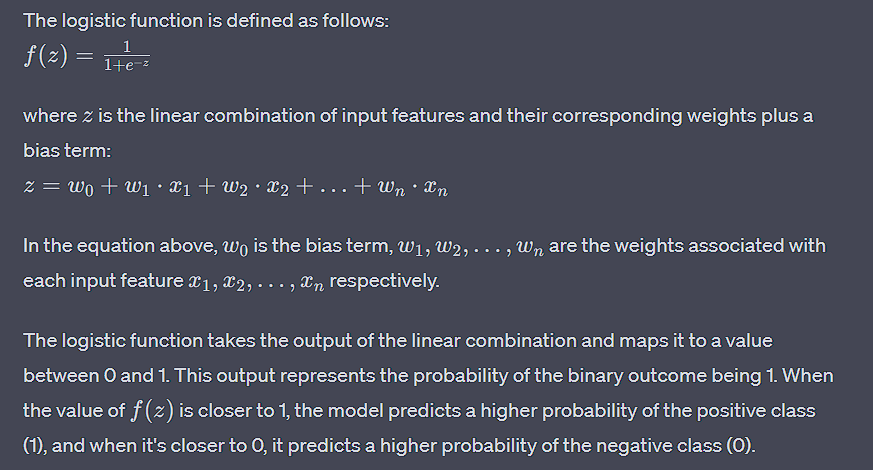

**Chart Representation:**

Let's plot the logistic function to see how it looks:

```python
pythonCopy code
import numpy as np
import matplotlib.pyplot as plt

def logistic_function(z):
    return 1 / (1 + np.exp(-z))

# Generating data for the plot
z_values = np.linspace(-6, 6, 100)
f_z_values = logistic_function(z_values)

# Plotting the logistic function
plt.plot(z_values, f_z_values)
plt.xlabel('z')
plt.ylabel('f(z)')
plt.title('Logistic Function (Sigmoid)')
plt.grid(True)
plt.show()

```

![Untitled](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/d52708ad-247d-4d78-a1e8-100a5023d17e/Untitled.png)

**Differences from Linear Regression:**

The main differences between logistic regression and linear regression are as follows:

1. **Output Type:**
    - Logistic Regression: The output of logistic regression is a probability value between 0 and 1, representing the probability of belonging to a particular class (e.g., probability of being in class 1).
    - Linear Regression: The output of linear regression is a continuous value, not constrained to any specific range.
2. **Model Type:**
    - Logistic Regression: Logistic regression is used for classification tasks, where the goal is to predict class labels.
    - Linear Regression: Linear regression is used for regression tasks, where the goal is to predict a continuous numeric value.
3. **Function Used:**
    - Logistic Regression: It uses the logistic function (sigmoid) to transform the output of the linear combination into a probability.
    - Linear Regression: It uses a linear function to model the relationship between input features and the target variable.
4. **Loss Function:**
    - Logistic Regression: The loss function used in logistic regression is typically the log loss or binary cross-entropy loss, which penalizes the model for incorrect predictions and drives it to predict higher probabilities for the correct class.
    - Linear Regression: Linear regression uses mean squared error (MSE) or mean absolute error (MAE) as the loss function, aiming to minimize the difference between predicted and actual continuous values.

Overall, logistic regression is well-suited for binary classification problems, where the goal is to predict one of two possible outcomes based on input features. It is widely used for various applications, including medical diagnosis, spam detection, and more.